In [1]:
%pylab inline
rcParams['font.family']='serif'

Populating the interactive namespace from numpy and matplotlib


### Almost Sure Convergence example 

In [2]:
from scipy import stats
np.random.seed(123456)
u=stats.uniform()
xn = lambda i: u.rvs(i).max()

In [3]:
xn(3)

0.96671783848200299

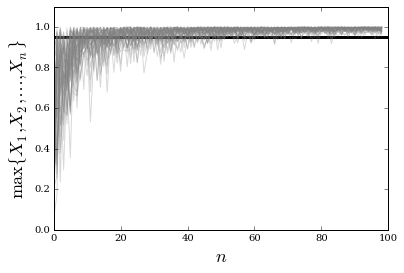

In [4]:
fig,ax = subplots()
for i in range(50):
    ax.plot(map(xn,range(1,100)),color='gray',alpha=.3)
ax.axis(xmin=0,ymax=1.1)
ax.hlines(.95,0,100,lw=3.)
ax.set_xlabel(r'$n$',fontsize=18,fontdict={'family':'serif'})
ax.set_ylabel(r'$\max \lbrace X_1,X_2,\ldots,X_n\rbrace$',fontsize=18)

# from matplotlib.font_manager import FontProperties
# ticks_font=FontProperties(family='serif',style='normal',size=12,weight='normal',stretch='normal')
# for label in ax.get_xticklabels():
#     label.set_fontproperties(ticks_font)
# for label in ax.get_yticklabels():
#     label.set_fontproperties(ticks_font)
    
fig.savefig('../fig-statistics/Convergence_001.png',dpi=120)


In [5]:
mean([xn(90) > 0.95 for i in range(1000)])

0.98899999999999999

In [6]:
np.log(1-.99)/np.log(.95)

89.781134960709679

## Convergence in Probability Example 

In [7]:
def make_interval(n):
    return np.array(zip(range(n+1),range(1,n+1)))/n

In [8]:
u.rvs(1)

array([ 0.71124094])

In [9]:
intervals= np.vstack([make_interval(i) for i in range(1,5)])
intervals

array([[ 0.        ,  1.        ],
       [ 0.        ,  0.5       ],
       [ 0.5       ,  1.        ],
       [ 0.        ,  0.33333333],
       [ 0.33333333,  0.66666667],
       [ 0.66666667,  1.        ],
       [ 0.        ,  0.25      ],
       [ 0.25      ,  0.5       ],
       [ 0.5       ,  0.75      ],
       [ 0.75      ,  1.        ]])

In [10]:
bits= lambda u:((intervals[:,0] < u) & (u<=intervals[:,1])).astype(int)

In [11]:
np.vstack([bits(u.rvs()) for i in range(10)])

array([[1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0]])

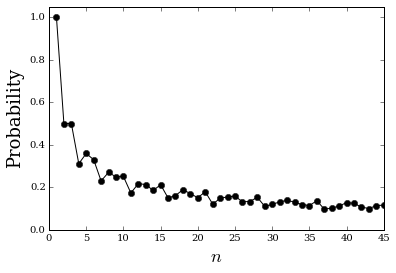

In [12]:
fig,ax=subplots()
intervals= np.vstack([make_interval(i) for i in range(1,10)])
v=vstack([bits(u.rvs()) for i in range(1000)]).mean(axis=0)
# bar(range(1,v.shape[0]+1),v,align='center',color='gray')
ax.plot(range(1,len(v)+1),v,color='k',marker='o')
ax.axis(ymin=0,ymax=1.05)
ax.set_xlabel(r'$n$',fontsize=18,fontdict={'family':'serif'})
ax.set_ylabel('Probability',fontsize=18)
fig.savefig('../fig-statistics/Convergence_002.png',dpi=120)


In [13]:
bits(u.rvs())

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])